#### El conjunto de datos del archivo Hotel.csv contiene información de reserva para un hotel urbano y un hotel resort, e incluye información como cuándo se realizó la reserva, duración de la estadía, la cantidad de adultos, niños y / o bebés, y la cantidad de espacios de estacionamiento disponibles, entre otras cosas. Toda la información de identificación personal se ha eliminado de los datos. Ambos hoteles están ubicados en Portugal. La columna “is_canceled” (1 es sí, 0 es no) para saber si fue o no cancelada

Preguntas para responder:

##### **Primero obtenemos el archivo mediante las siguientes instrucciones y vemos el tamano y lo que contiene**

In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import json
import requests
import os

In [ ]:
dfho=pd.read_json('https://analytics.deacero.com/api/teenus/get-data/c744a2a4-ab89-5432-b5e6-9f320162e160')
#https://analytics.deacero.com/api/teenus/get-data/api_key

In [ ]:
#dfho=pd.read_csv("HotelDF.csv")
#dfho.to_csv("HotelDF.csv") 

In [ ]:
pd.set_option('display.max_columns', None)

print(dfho.shape)
dfho.head()

#por si hay NAN
#dfho = dfho.dropna()
#print(dfho.shape)

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,615,2017,March,11,16,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,NULL,0,Transient,62.0,0,0,Canceled,21/10/2015
1,City Hotel,1,615,2017,March,11,16,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,NULL,0,Transient,62.0,0,0,Canceled,21/10/2015
2,City Hotel,1,615,2017,March,11,16,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,NULL,0,Transient,62.0,0,0,Canceled,21/10/2015
3,City Hotel,1,615,2017,March,11,16,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,NULL,0,Transient,62.0,0,0,Canceled,21/10/2015
4,City Hotel,1,615,2017,March,11,16,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,NULL,0,Transient,62.0,0,0,Canceled,21/10/2015


In [ ]:
#dfho.columns
#print(list(dfho))
#print(dfho.columns.values.tolist())
#list(dfho.columns.values)
dfho.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                           object
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
dfho.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
#POR SI SON DATOS DUPLICADOS
#dfho = dfho.drop_duplicates(keep='first')
#print(dfho.shape)


In [ ]:
#BASE CON TODDOS LOS DATOS (INLUYENDO PAISES NO CATALOGADOS COMO NULL y DE PRECIO adr=0)
dfhoall=dfho.copy()


In [ ]:
#print(dfho.country.unique())
print(pd.unique(dfho['country']))


['PRT' 'NLD' 'FRA' 'IRL' 'GRC' 'ESP' 'GBR' 'TUR' 'DEU' 'BRA' 'DNK' 'LUX'
 'ITA' 'USA' 'CN' 'CHE' 'BEL' 'CHN' 'NOR' 'ROU' 'AUT' 'SAU' 'POL' 'ISR'
 'FIN' 'RUS' 'HUN' 'TUN' 'ARG' 'SVN' 'AGO' 'BEN' 'MAC' 'ARE' 'SWE' 'CHL'
 'MOZ' 'CPV' 'MAR' 'AUS' 'CZE' 'EST' 'JPN' 'KOR' 'MNE' 'PHL' 'MEX' 'NGA'
 'ZAF' 'KWT' 'COL' 'UKR' 'LVA' 'PER' 'THA' 'HRV' 'NZL' 'BHR' 'IDN' 'UMI'
 'IND' 'OMN' 'BWA' 'DZA' 'EGY' 'MLT' 'JEY' 'ECU' 'CYP' 'SVK' 'BGR' 'ALB'
 'SEN' 'SMR' 'PRI' 'SRB' 'LTU' 'HKG' 'BLR' 'IRN' 'BGD' 'DOM' 'MDV' 'CYM'
 'ZMB' 'ZWE' 'URY' 'MYT' 'JOR' 'TWN' 'QAT' 'MYS' 'CRI' 'KAZ' 'GNB' 'GHA'
 'FRO' 'GAB' 'CIV' 'AND' 'AZE' 'GIB' 'LIE' 'TZA' 'JAM' 'VNM' 'GEO' 'CAF'
 'IMN' 'GGY' 'LBN' 'CMR' 'VEN' 'MMR' 'IRQ' 'FJI' 'PAK' 'ISL' 'PAN' 'SYC'
 'SGP' 'TMP' 'MUS' 'BFA' 'ARM' 'KEN' 'LKA' 'MCO' 'LBY' 'MKD' 'MLI' 'CUB'
 'BIH' 'COM' 'SUR' 'NAM' 'BOL' 'UGA' 'UZB' 'SYR' 'BDI' 'PRY' 'BRB' 'ABW'
 'AIA' 'PLW' 'SLV' 'DMA' 'GLP' 'MWI' 'PYF' 'MDG' 'GUY' 'LCA' 'ATA' 'RWA'
 'NPL' 'BHS' 'ETH' 'TGO' 'GTM' 'DJI' 'ASM' 'STP' 'MR

In [ ]:
#QUITAR PAISES SIN CATALOGAR country=NULL
print('renglones con PAISES nulos a eliminar',dfho['country'].value_counts()['NULL'])

dfho = dfho[dfho['country'] != "NULL"]
dfho = dfho.reset_index()

dfho=dfho.drop(['index'], axis=1)

renglones con PAISES nulos a eliminar 488


In [ ]:
#QUITAR PRECIOS CON adr=0
print('renglones con PRECIOS nulos a eliminar',dfho['adr'].value_counts()[0])

dfho = dfho[dfho['adr'] != 0.0]
dfho = dfho.reset_index()

dfho=dfho.drop(['index'], axis=1)

renglones con PRECIOS nulos a eliminar 1938


In [ ]:
#QUITAR REGISTROS ADULTS CON adults=0
print('renglones con PRECIOS nulos a eliminar',dfho['adults'].value_counts()[0])

dfho = dfho[dfho['adults'] != 0.0]
dfho = dfho.reset_index()

dfho=dfho.drop(['index'], axis=1)

renglones con PRECIOS nulos a eliminar 248


In [ ]:
#BASE DE DATOS SEPARANDO CITY HOTEL Y RESORT HOTEL
dfho_city = dfho[dfho['hotel'] == 'City Hotel']
dfho_city = dfho_city.reset_index()

dfho_city=dfho_city.drop(['index'], axis=1)

dfho_resort = dfho[dfho['hotel'] == 'Resort Hotel']
dfho_resort = dfho_resort.reset_index()

dfho_resort=dfho_resort.drop(['index'], axis=1)

##### **¿De dónde vienen los huéspedes?**

In [ ]:
# value counts of each unique value
countries=dfho['country'].value_counts()
print(countries)
dfcountries = pd.DataFrame(countries)
dfcountries.columns = ['frequency']
dfcountries = dfcountries.rename_axis('country').reset_index()
#dfcountries.head(30)
#para ordenarlos por orden alfabetico
#dfcountries.sort_values(by=['country'])

#City Hotel
countriescity=dfho_city['country'].value_counts()
print(countriescity)
dfcountriescity = pd.DataFrame(countriescity)
dfcountriescity.columns = ['frequency']
dfcountriescity = dfcountriescity.rename_axis('country').reset_index()

#Resort Hotel
countriesresort=dfho_resort['country'].value_counts()
print(countriesresort)
dfcountriesresort = pd.DataFrame(countriesresort)
dfcountriesresort.columns = ['frequency']
dfcountriesresort = dfcountriesresort.rename_axis('country').reset_index()


In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express



In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
import io
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import sys
'geopandas' in sys.modules

True

In [ ]:
fig = px.choropleth(dfcountries, locations="country",
                    locationmode='ISO-3',
                    #color="frequency", 
                    hover_name="country"
                    )

fig.show()

In [ ]:
fig = px.choropleth(dfcountries, locations="country",
                    locationmode='ISO-3',
                    color="frequency", 
                    hover_name="country",
                    color_continuous_scale="Rainbow",
                    #colorscale = 'Reds',
                    #color_continuous_scale=px.colors.sequential.Greens,
                    #range_color=[dfc2["frequency"].min(),dfc2["frequency"].max()]
                    )

fig.show()


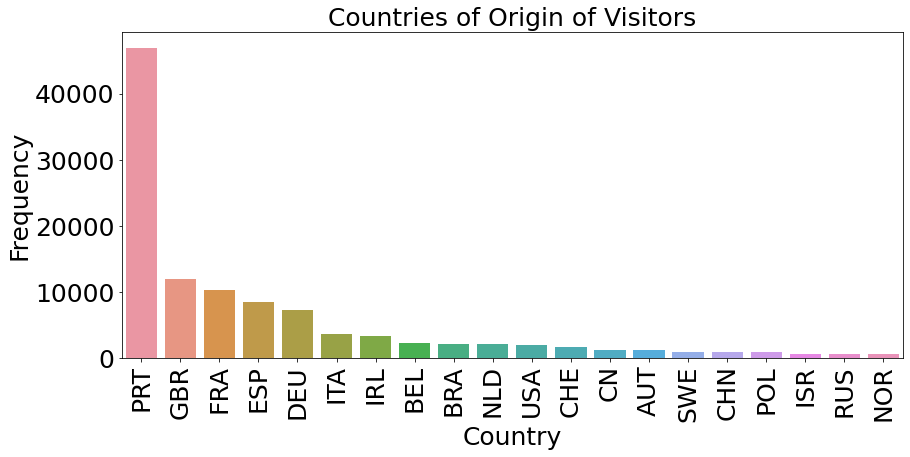

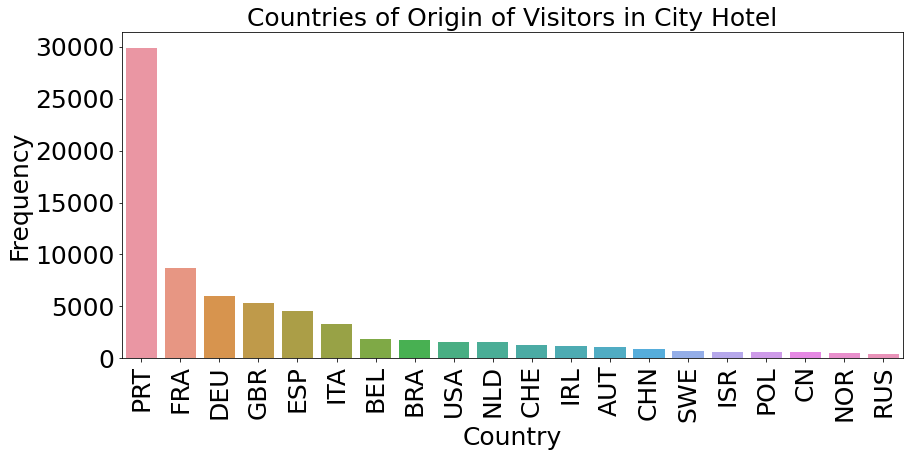

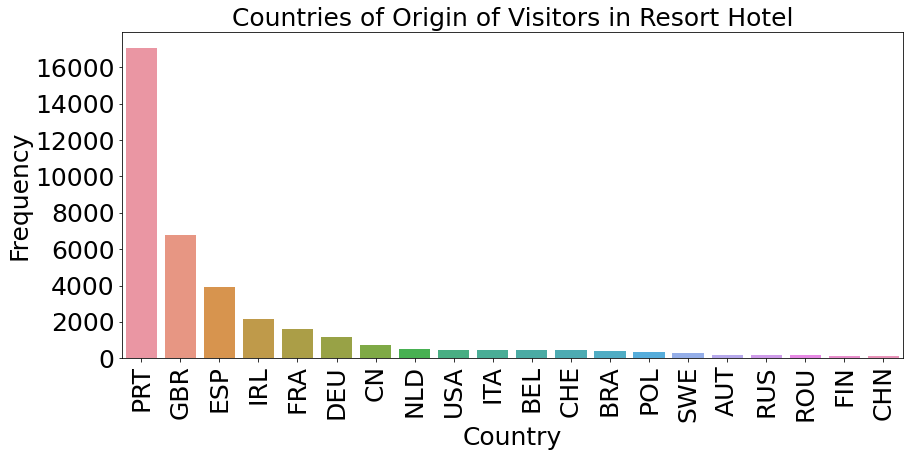

In [ ]:
data=dfcountries.head(20)

plt.subplots(figsize=(14,6)) 
sns.barplot(x="country", y="frequency", data=data)

plt.xticks(rotation=90, size=25)
plt.yticks(rotation=0, size=25)
plt.xlabel('Country',size=25)
plt.ylabel('Frequency',size=25)
plt.title("Countries of Origin of Visitors",size=25)

plt.show()

#City Hotel
datacity=dfcountriescity.head(20)

plt.subplots(figsize=(14,6)) 
sns.barplot(x="country", y="frequency", data=datacity)

plt.xticks(rotation=90, size=25)
plt.yticks(rotation=0, size=25)
plt.xlabel('Country',size=25)
plt.ylabel('Frequency',size=25)
plt.title("Countries of Origin of Visitors in City Hotel",size=25)

plt.show()

#Resort Hotel
dataresort=dfcountriesresort.head(20)

plt.subplots(figsize=(14,6)) 
sns.barplot(x="country", y="frequency", data=dataresort)

plt.xticks(rotation=90, size=25)
plt.yticks(rotation=0, size=25)
plt.xlabel('Country',size=25)
plt.ylabel('Frequency',size=25)
plt.title("Countries of Origin of Visitors in Resort Hotel",size=25)

plt.show()


In [ ]:
dfcountries2=dfcountries.copy()
dfcountries2.loc[dfcountries2.shape[0]] = ['REST', dfcountries2.iloc[10:, 1].sum() ]
dfcountries2.drop(dfcountries2.index[10:-1], inplace=True)

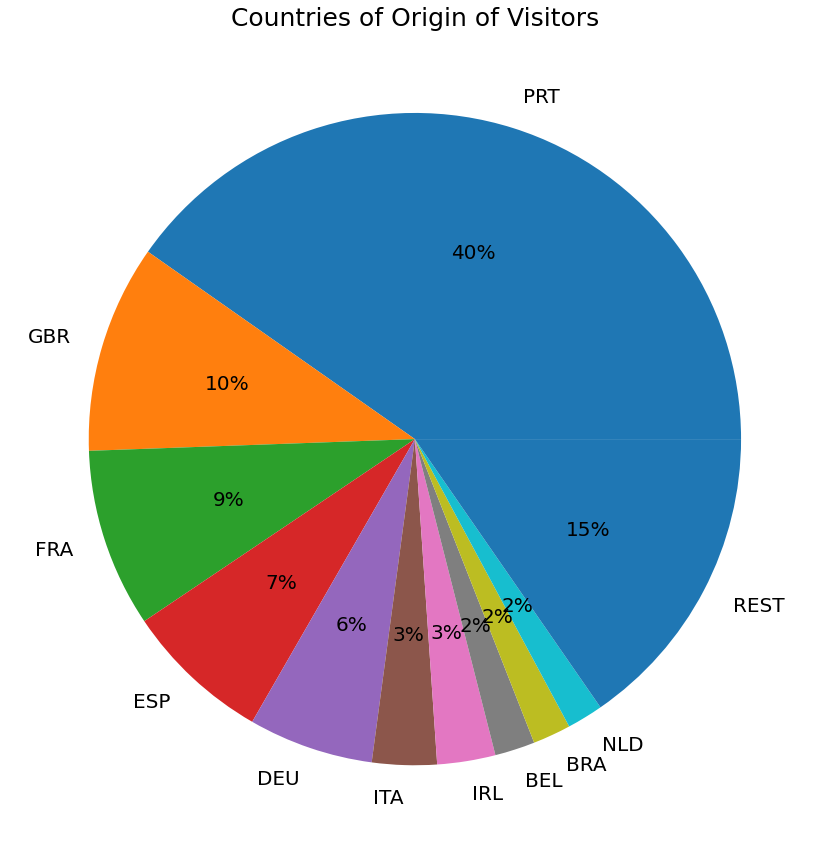

In [ ]:
fig = plt.figure(figsize = (15, 15))
plt.pie(dfcountries2.frequency,labels=dfcountries2.country,autopct='%1.0f%%',textprops={"fontsize":20})

plt.title('Countries of Origin of Visitors',fontsize=25)
plt.show()

##### **¿Cuánto pagan los huéspedes por una habitación por noche en promedio?**

In [ ]:
proms=dfho[['arrival_date_month','hotel','adr']].copy()
promsbar=dfho[['hotel','adr']].copy()

#proms

In [ ]:
proms3=proms.groupby(['hotel'])['adr'].mean().reset_index()
proms3

,hotel,adr
0,City Hotel,107.023768
1,Resort Hotel,97.160197


In [ ]:
proms4=proms['adr'].mean()
print('Promedio Total de lo que las persons pagan por habitación',proms4)


Promedio Total de lo que las persons pagan por habitación 103.73999580177525


In [ ]:
proms3.loc[proms3.shape[0]] = ['Total', proms4 ]
proms3

,hotel,adr
0,City Hotel,107.023768
1,Resort Hotel,97.160197
2,Total,103.739996


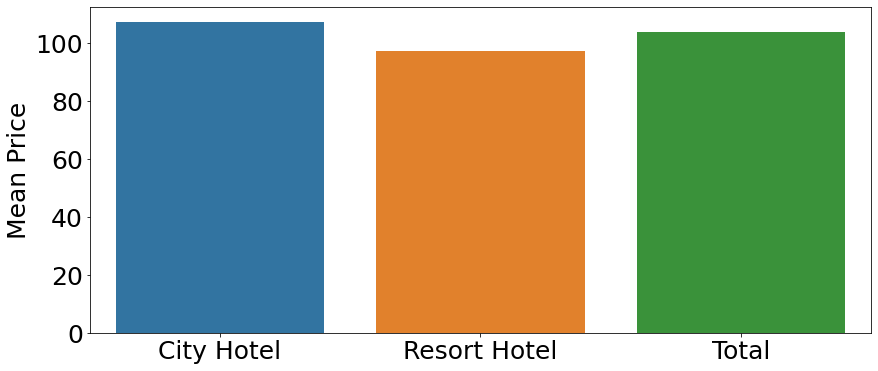

In [ ]:
data=proms3

plt.subplots(figsize=(14,6)) 
sns.barplot(x="hotel", y="adr", data=data)

plt.xticks(rotation=0, size=25)
plt.yticks(rotation=0, size=25)
plt.xlabel('',size=25)
plt.ylabel('Mean Price',size=25)
#plt.title("Precio por noche",size=25)


plt.show()

##### **¿Cómo varía el precio por noche durante el año?**

In [ ]:
#price year variation
pyvar=dfho[['arrival_date_year','arrival_date_month','adr']].copy()

pyALL=pyvar.groupby(['arrival_date_year','arrival_date_month']).mean().reset_index()
#pyALL.head(3)

py15 = pyALL[pyALL['arrival_date_year'] == 2015]
py16 = pyALL[pyALL['arrival_date_year'] == 2016]
py17 = pyALL[pyALL['arrival_date_year'] == 2017]

month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
py15=py15.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
py16=py16.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
py17=py17.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))

dframes=[py15,py16,py17]
pyT=pd.concat(dframes)

pyT["date"] = pyT['arrival_date_month'] +""+ pyT["arrival_date_year"].astype(str)
#pyT.head(5)

###City Hotel
#price year variation
pyvarcity=dfho_city[['arrival_date_year','arrival_date_month','adr']].copy()

pyALLcity=pyvarcity.groupby(['arrival_date_year','arrival_date_month']).mean().reset_index()
#pyALL.head(3)

py15city = pyALLcity[pyALLcity['arrival_date_year'] == 2015]
py16city = pyALLcity[pyALLcity['arrival_date_year'] == 2016]
py17city = pyALLcity[pyALLcity['arrival_date_year'] == 2017]

month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
py15city=py15city.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
py16city=py16city.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
py17city=py17city.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))

dframescity=[py15city,py16city,py17city]
pyTcity=pd.concat(dframescity)

pyTcity["date"] = pyTcity['arrival_date_month'] +""+ pyTcity["arrival_date_year"].astype(str)
#pyTcity.head(5)

###Resort Hotel
#price year variation
pyvarresort=dfho_resort[['arrival_date_year','arrival_date_month','adr']].copy()

pyALLresort=pyvarresort.groupby(['arrival_date_year','arrival_date_month']).mean().reset_index()
#pyALL.head(3)

py15resort = pyALLresort[pyALLresort['arrival_date_year'] == 2015]
py16resort = pyALLresort[pyALLresort['arrival_date_year'] == 2016]
py17resort = pyALLresort[pyALLresort['arrival_date_year'] == 2017]

month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
py15resort=py15resort.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
py16resort=py16resort.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
py17resort=py17resort.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))

dframesresort=[py15resort,py16resort,py17resort]
pyTresort=pd.concat(dframesresort)

pyTresort["date"] = pyTresort['arrival_date_month'] +""+ pyTresort["arrival_date_year"].astype(str)
#pyTresort.head(5)


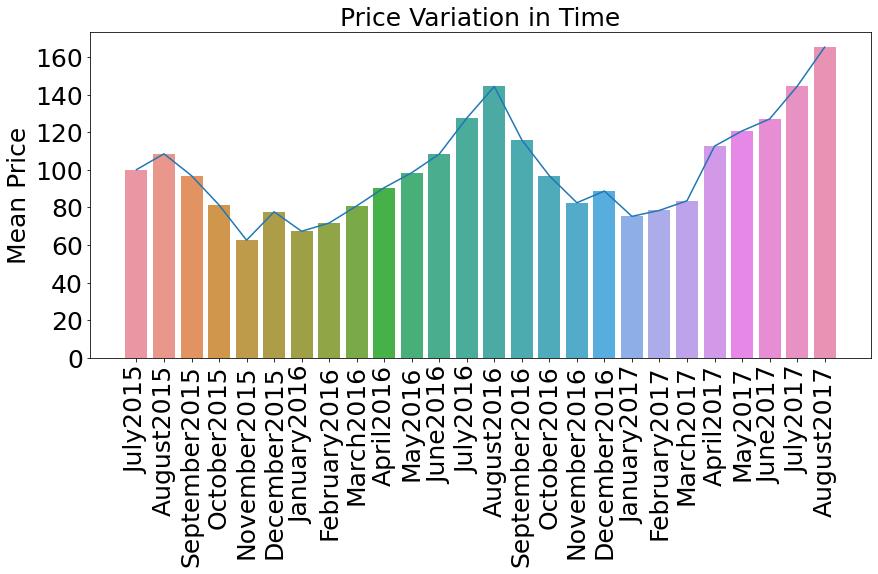

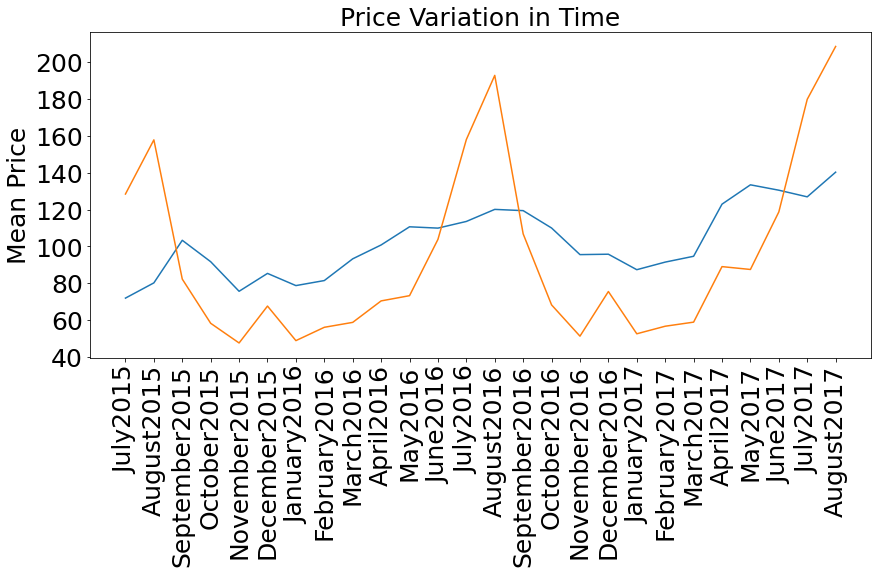

In [ ]:
data=pyT
plt.subplots(figsize=(14,6)) 
sns.barplot(x="date", y="adr", data=data)
sns.lineplot(data=data, x="date", y="adr")

plt.xticks(rotation=90, size=25)
plt.yticks(rotation=0, size=25)
plt.xlabel('',size=25)
plt.ylabel('Mean Price',size=25)
plt.title("Price Variation in Time",size=25)

plt.show()

plt.subplots(figsize=(14,6)) 
sns.lineplot(data=pyTcity, x="date", y="adr")
sns.lineplot(data=pyTresort, x="date", y="adr")

plt.xticks(rotation=90, size=25)
plt.yticks(rotation=0, size=25)
plt.xlabel('',size=25)
plt.ylabel('Mean Price',size=25)
plt.title("Price Variation in Time",size=25)

plt.show()

##### **¿Cuáles son los meses más ocupados?**

In [ ]:
est_occ=dfho[['hotel','arrival_date_month']].copy()
est_occ=est_occ.groupby(['arrival_date_month']).count().reset_index()
#est_occ
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
est_occ=est_occ.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
#est_occ

In [ ]:
real_occ=dfho[['hotel','arrival_date_month','is_canceled']].copy()
real_occ=real_occ.groupby(['is_canceled','arrival_date_month']).count().reset_index()
#real_occ
real_occ2=real_occ.iloc[0:12,:]
#real_occ2
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
real_occ2=real_occ2.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
#real_occ2

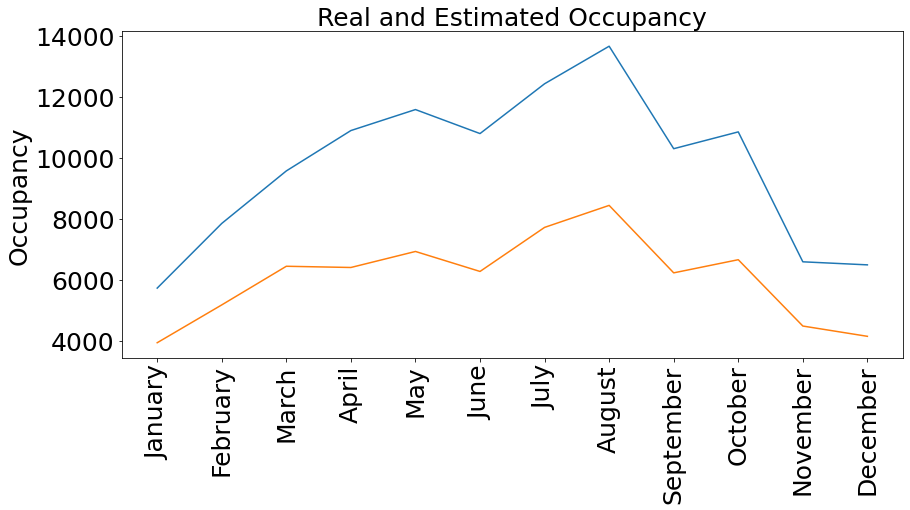

In [ ]:
#data=est_occ
plt.subplots(figsize=(14,6)) 
sns.lineplot(x="arrival_date_month", y="hotel", data=est_occ)
sns.lineplot(x="arrival_date_month", y="hotel", data=real_occ2)

plt.xticks(rotation=90, size=25)
plt.yticks(rotation=0, size=25)
plt.xlabel('',size=25)
plt.ylabel('Occupancy',size=25)
plt.title("Real and Estimated Occupancy",size=25)

plt.show()

##### **¿Cuánto tiempo se queda la gente en los hoteles (noches)?**

In [ ]:
days_stay=dfho[['hotel','reservation_status']].copy()
days_stay['stays_total']=dfho['stays_in_weekend_nights']+dfho['stays_in_week_nights']
#days_stay.head

In [ ]:
days_stay2=days_stay.groupby(['hotel','reservation_status']).mean().reset_index()
days_stay2

,hotel,reservation_status,stays_total
0,City Hotel,Canceled,3.034272
1,City Hotel,Check-Out,2.950069
2,City Hotel,No-Show,3.873051
3,Resort Hotel,Canceled,4.828529
4,Resort Hotel,Check-Out,4.229129
5,Resort Hotel,No-Show,3.481884


In [ ]:
days_stay3=days_stay.groupby(['hotel']).mean().reset_index()
days_stay3

,hotel,stays_total
0,City Hotel,2.995299
1,Resort Hotel,4.389171


In [ ]:
print('El tiempo promedio que la gente se queda en un hotel es de',round(days_stay['stays_total'].mean(),2),'dias')

El tiempo promedio que la gente se queda en un hotel es de 3.46 dias


In [ ]:
# Contar las veces que los huespedes se quedan para cada numero de dias en la DF
dfTstay=days_stay['stays_total'].value_counts()
#print(Tstay)
dfTstay = pd.DataFrame(dfTstay)
dfTstay.columns = ['frequency']
dfTstay = dfTstay.rename_axis('num_of_days').reset_index()
#dfTstay
dfTstay=dfTstay.sort_values(by = "num_of_days",ascending = True)
#dfTstay

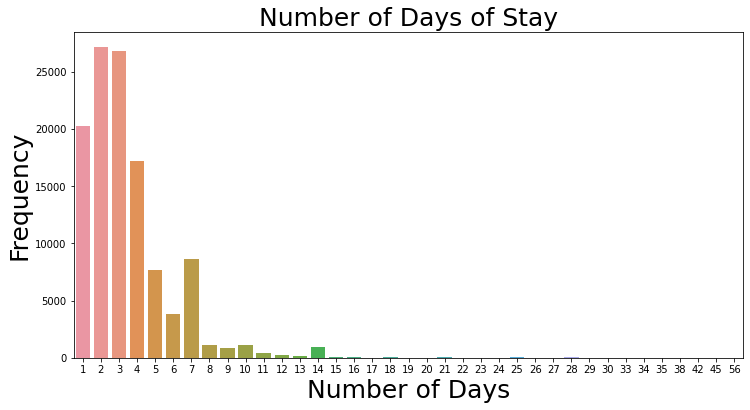

In [ ]:
data=dfTstay

plt.subplots(figsize=(12,6)) 
sns.barplot(x="num_of_days", y="frequency", data=data)

plt.xticks(rotation=0, size=10)
plt.yticks(rotation=0, size=10)
plt.xlabel('Number of Days',size=25)
plt.ylabel('Frequency',size=25)
plt.title("Number of Days of Stay",size=25)


plt.show()

In [ ]:
#All Hotels
stays_hotels=days_stay.groupby(['hotel','stays_total']).count().reset_index()
stays_hotels

#City Hotel
stays_city = stays_hotels[stays_hotels['hotel'] == 'City Hotel']
stays_city = stays_city.reset_index()
stays_city=stays_city.drop(['index'], axis=1)

#Resort Hotel
stays_resort = stays_hotels[stays_hotels['hotel'] == 'Resort Hotel']
stays_resort = stays_resort.reset_index()
stays_resort=stays_resort.drop(['index'], axis=1)

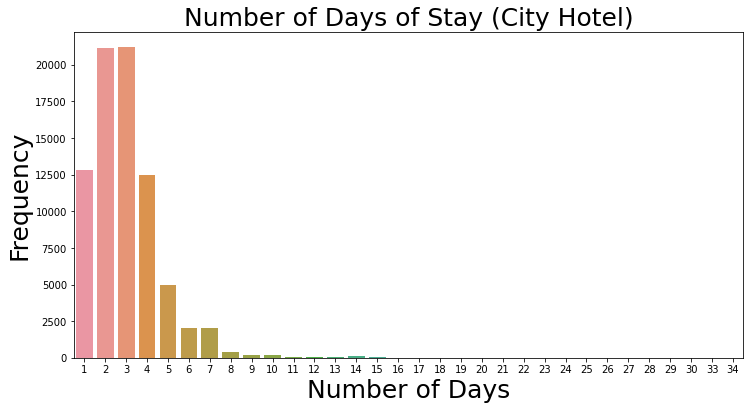

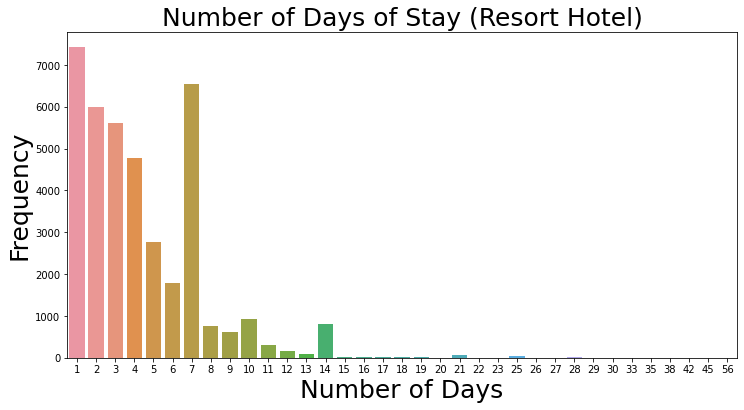

In [ ]:
#City Hotel
plt.subplots(figsize=(12,6)) 
sns.barplot(x="stays_total", y="reservation_status", data=stays_city)

plt.xticks(rotation=0, size=10)
plt.yticks(rotation=0, size=10)
plt.xlabel('Number of Days',size=25)
plt.ylabel('Frequency',size=25)
plt.title("Number of Days of Stay (City Hotel)",size=25)

plt.show()

#Resort Hotel
plt.subplots(figsize=(12,6)) 
sns.barplot(x="stays_total", y="reservation_status", data=stays_resort)

plt.xticks(rotation=0, size=10)
plt.yticks(rotation=0, size=10)
plt.xlabel('Number of Days',size=25)
plt.ylabel('Frequency',size=25)
plt.title("Number of Days of Stay (Resort Hotel)",size=25)

plt.show()

##### **Reservas por segmento de mercado**

In [ ]:
segm=dfho['market_segment'].value_counts()
dfsegm= pd.DataFrame(segm)
dfsegm.columns = ['frequency']
dfsegm = dfsegm.rename_axis('market_segment').reset_index()

dfsegm

,market_segment,frequency
0,Online TA,55830
1,Offline TA/TO,23825
2,Groups,19554
3,Direct,12179
4,Corporate,5033
5,Aviation,231
6,Complementary,62
7,Undefined,2


In [ ]:
segmcity=dfho_city['market_segment'].value_counts()
dfsegmcity= pd.DataFrame(segmcity)
dfsegmcity.columns = ['frequency']
dfsegmcity = dfsegmcity.rename_axis('market_segment').reset_index()

dfsegmcity

,market_segment,frequency
0,Online TA,38368
1,Offline TA/TO,16492
2,Groups,13829
3,Direct,5950
4,Corporate,2954
5,Aviation,231
6,Complementary,33
7,Undefined,2


In [ ]:
segmresort=dfho_resort['market_segment'].value_counts()
dfsegmresort= pd.DataFrame(segmresort)
dfsegmresort.columns = ['frequency']
dfsegmresort = dfsegmresort.rename_axis('market_segment').reset_index()

dfsegmresort

,market_segment,frequency
0,Online TA,17462
1,Offline TA/TO,7333
2,Direct,6229
3,Groups,5725
4,Corporate,2079
5,Complementary,29


##### **¿Cuántas reservas se cancelaron?**

In [ ]:
reser=dfho['reservation_status'].value_counts()
#print(reser)
dfres = pd.DataFrame(reser)
dfres.columns = ['frequency']
dfres = dfres.rename_axis('reservation_status').reset_index()
dfres



,reservation_status,frequency
0,Check-Out,72844
1,Canceled,42698
2,No-Show,1174


In [ ]:
#City Hotel
resercity=dfho_city['reservation_status'].value_counts()
#print(resercity)
dfrescity = pd.DataFrame(resercity)
dfrescity.columns = ['frequency']
dfrescity = dfrescity.rename_axis('reservation_status').reset_index()
dfrescity

,reservation_status,frequency
0,Check-Out,44982
1,Canceled,31979
2,No-Show,898


In [ ]:
#Resort Hotel
reserresort=dfho_resort['reservation_status'].value_counts()
#print(reserresort)
dfresresort = pd.DataFrame(reserresort)
dfresresort.columns = ['frequency']
dfresresort = dfresresort.rename_axis('reservation_status').reset_index()
dfresresort

,reservation_status,frequency
0,Check-Out,27862
1,Canceled,10719
2,No-Show,276


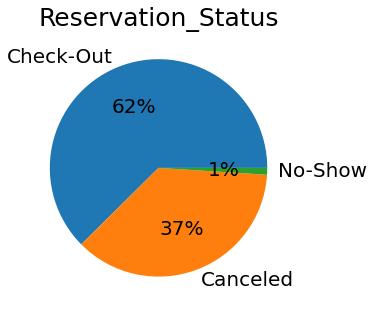

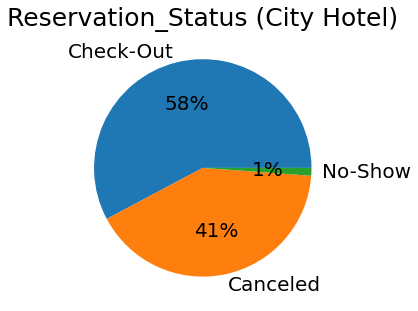

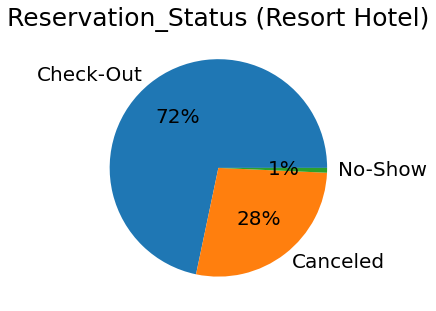

In [ ]:
fig = plt.figure(figsize = (5, 5))
plt.pie(dfres.frequency,labels=dfres.reservation_status,autopct='%1.0f%%',textprops={"fontsize":20})

plt.title('Reservation_Status',fontsize=25)
plt.show()

#City Hotel
fig = plt.figure(figsize = (5, 5))
plt.pie(dfrescity.frequency,labels=dfrescity.reservation_status,autopct='%1.0f%%',textprops={"fontsize":20})

plt.title('Reservation_Status (City Hotel)',fontsize=25)
plt.show()

#Resort Hotel
fig = plt.figure(figsize = (5, 5))
plt.pie(dfresresort.frequency,labels=dfresresort.reservation_status,autopct='%1.0f%%',textprops={"fontsize":20})

plt.title('Reservation_Status (Resort Hotel)',fontsize=25)
plt.show()

##### **¿Qué mes tiene el mayor número de cancelaciones?**

In [ ]:
stats=dfho[['hotel','arrival_date_month','is_canceled','reservation_status']].copy()
stats=stats.groupby(['hotel','is_canceled','arrival_date_month']).count().reset_index()


stats_ALL = stats[stats['is_canceled'] == 1]
stats_ALL = stats_ALL.reset_index()
stats_ALL=stats_ALL.drop(['index'], axis=1)

#City Hotel
stats_city = stats_ALL[stats_ALL['hotel'] == 'City Hotel']
stats_city = stats_city.reset_index()
stats_city=stats_city.drop(['index'], axis=1)

#Resort Hotel
stats_resort = stats_ALL[stats_ALL['hotel'] == 'Resort Hotel']
stats_resort = stats_resort.reset_index()
stats_resort=stats_resort.drop(['index'], axis=1)

In [ ]:
cancel=real_occ.iloc[12:,:]
#cancel
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
cancel=cancel.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
#cancel
#dfho[['arrival_date_month','reservation_status']].value_counts()

#City Hotel
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
cancel_city=stats_city.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))

#Resort Hotel
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
cancel_resort=stats_resort.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))

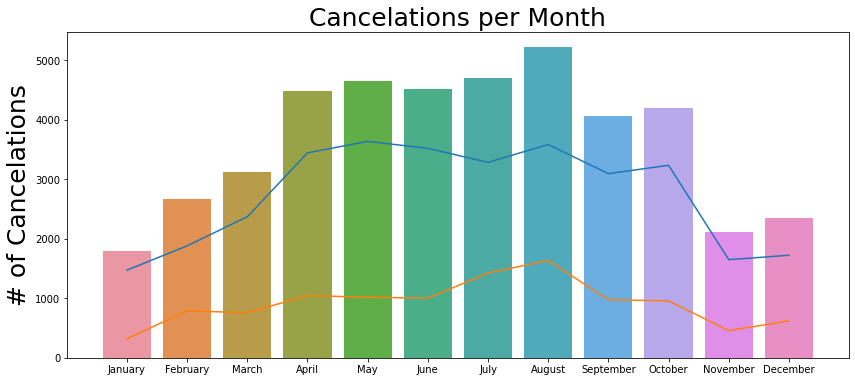

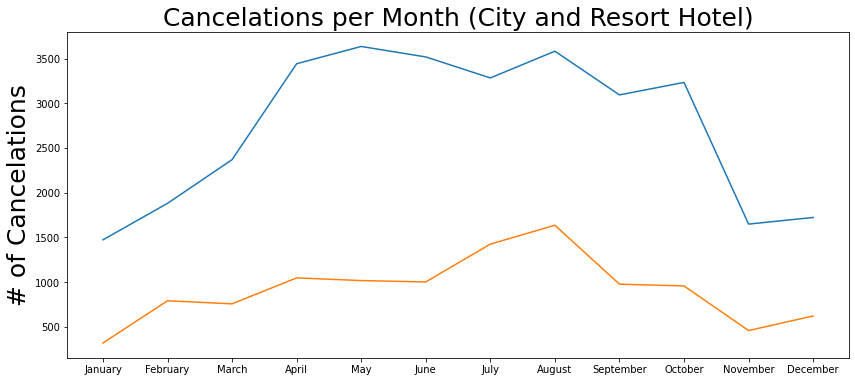

In [ ]:
data=cancel

plt.subplots(figsize=(14,6)) 
sns.barplot(x="arrival_date_month", y="hotel", data=data)
sns.lineplot(x="arrival_date_month", y="reservation_status", data=cancel_city)
sns.lineplot(x="arrival_date_month", y="reservation_status", data=cancel_resort)

plt.xticks(rotation=0, size=10)
plt.yticks(rotation=0, size=10)
plt.xlabel('',size=25)
plt.ylabel('# of Cancelations',size=25)
plt.title("Cancelations per Month",size=25)

plt.show()

#City Hotel and Resort Hotel
plt.subplots(figsize=(14,6)) 
sns.lineplot(x="arrival_date_month", y="reservation_status", data=cancel_city)
sns.lineplot(x="arrival_date_month", y="reservation_status", data=cancel_resort)

plt.xticks(rotation=0, size=10)
plt.yticks(rotation=0, size=10)
plt.xlabel('',size=25)
plt.ylabel('# of Cancelations',size=25)
plt.title("Cancelations per Month (City and Resort Hotel)",size=25)

plt.show()

##### **Hacer tabla de correlación para las variables**

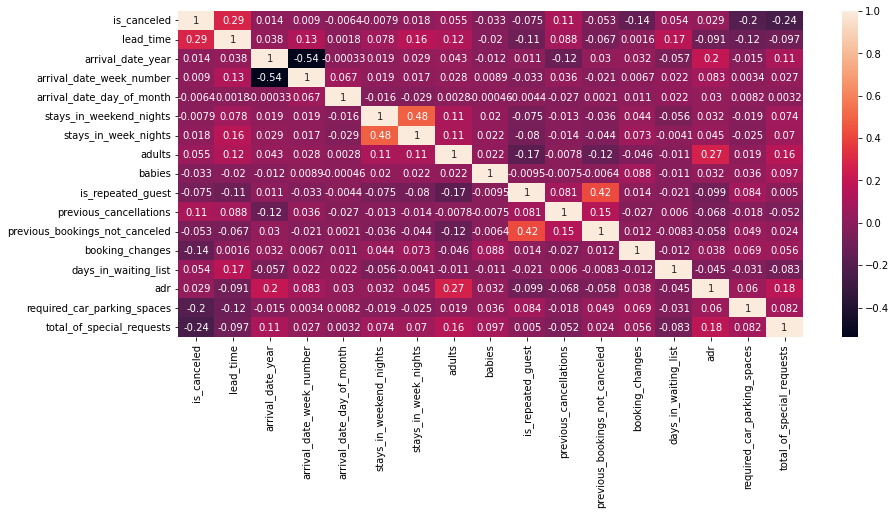

In [ ]:
import seaborn as sn

plt.subplots(figsize=(14,6)) 
CT=dfho.corr()
sn.heatmap(CT, annot=True)
plt.show()
